In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Better visuals
sns.set(style="whitegrid")

# Ignore warnings for now
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("customer_support_tickets.csv")


In [3]:
df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [4]:
df.shape


(8469, 17)

In [5]:
df.columns


Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [7]:
df.describe()


,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [8]:
df.isnull().sum()


Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [9]:
df = df[df['Customer Satisfaction Rating'].notna()]


In [10]:
df.shape


(2769, 17)

In [11]:
df.drop(['Ticket ID', 'Customer Name', 'Customer Email'], axis=1, inplace=True)


In [12]:
df.columns


Index(['Customer Age', 'Customer Gender', 'Product Purchased',
       'Date of Purchase', 'Ticket Type', 'Ticket Subject',
       'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority',
       'Ticket Channel', 'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [13]:
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])

df['First Response Time'] = pd.to_datetime(
    df['First Response Time'], errors='coerce'
)

df['Time to Resolution'] = pd.to_datetime(
    df['Time to Resolution'], errors='coerce'
)


In [14]:
df['Resolution_Hours'] = (
    df['Time to Resolution'] - df['First Response Time']
).dt.total_seconds() / 3600


In [15]:
df[['Resolution_Hours']].head()


,Resolution_Hours
2,6.850000
3,-5.533333
4,19.683333
10,-17.916667
11,-2.633333


In [16]:
df.isnull().sum()


Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
Resolution_Hours                0
dtype: int64

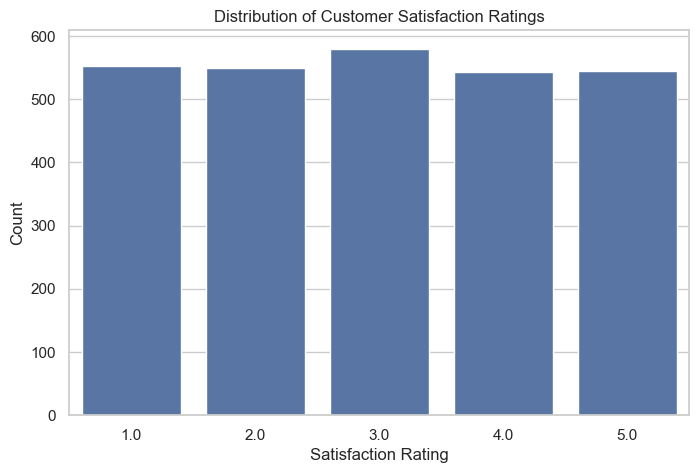

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x='Customer Satisfaction Rating', data=df)
plt.title('Distribution of Customer Satisfaction Ratings')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Count')
plt.show()


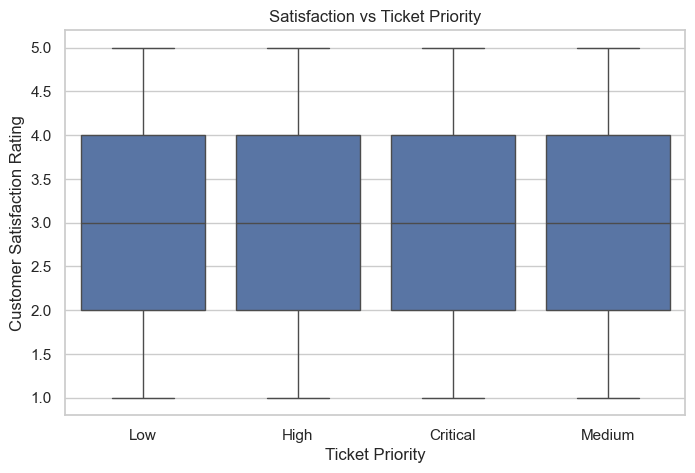

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Ticket Priority', y='Customer Satisfaction Rating', data=df)
plt.title('Satisfaction vs Ticket Priority')
plt.show()


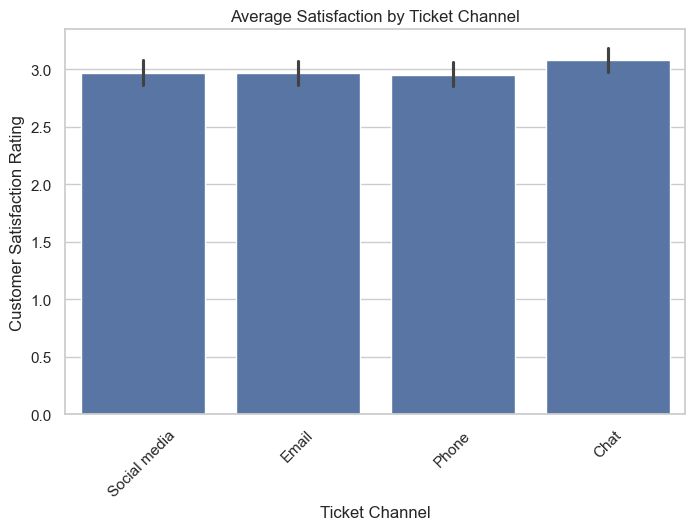

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Ticket Channel',
    y='Customer Satisfaction Rating',
    data=df,
    estimator=np.mean
)
plt.title('Average Satisfaction by Ticket Channel')
plt.xticks(rotation=45)
plt.show()


In [20]:
df.loc[df['Resolution_Hours'] < 0, 'Resolution_Hours'] = np.nan


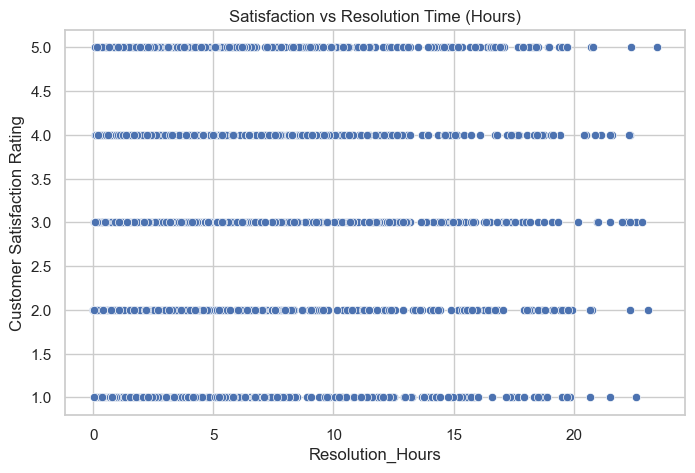

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Resolution_Hours',
    y='Customer Satisfaction Rating',
    data=df
)
plt.title('Satisfaction vs Resolution Time (Hours)')
plt.show()


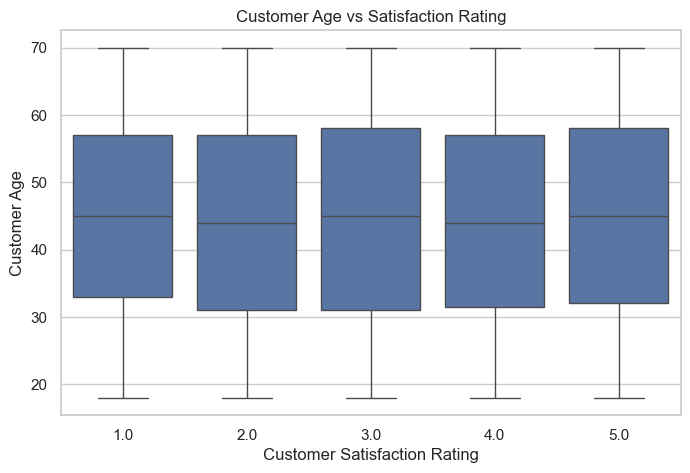

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Customer Satisfaction Rating', y='Customer Age', data=df)
plt.title('Customer Age vs Satisfaction Rating')
plt.show()


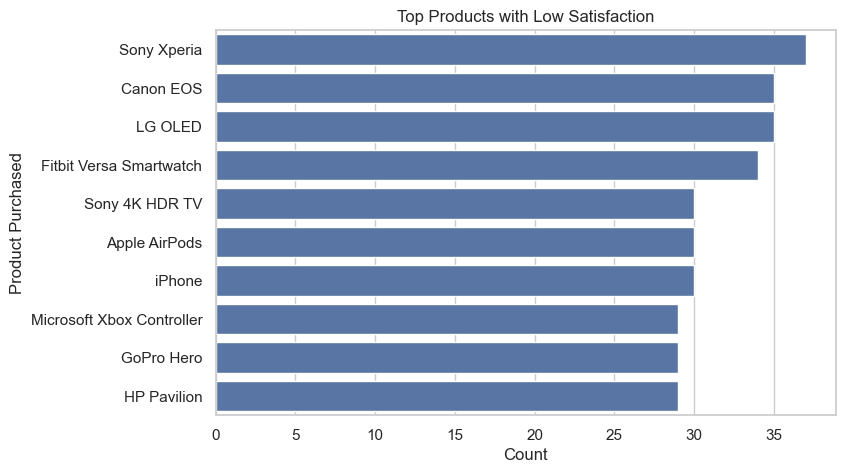

In [23]:
low_sat = df[df['Customer Satisfaction Rating'] <= 2]

top_low_products = low_sat['Product Purchased'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(
    y=top_low_products.index,
    x=top_low_products.values
)
plt.title('Top Products with Low Satisfaction')
plt.xlabel('Count')
plt.show()


In [24]:
# Define target
y = df['Customer Satisfaction Rating']

# Define features
X = df.drop('Customer Satisfaction Rating', axis=1)

X.head()


,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Resolution_Hours
2,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,6.850000
3,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,NaN
4,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,19.683333
10,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,NaN
11,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,NaN


In [25]:
cols_to_drop = [
    'Ticket Subject',
    'Ticket Description',
    'Resolution',
    'Date of Purchase',
    'First Response Time',
    'Time to Resolution'
]

X.drop(cols_to_drop, axis=1, inplace=True)

X.columns


Index(['Customer Age', 'Customer Gender', 'Product Purchased', 'Ticket Type',
       'Ticket Status', 'Ticket Priority', 'Ticket Channel',
       'Resolution_Hours'],
      dtype='object')

In [26]:
# Separate numeric and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns


In [27]:
# Numeric columns
for col in num_cols:
    X[col].fillna(X[col].median(), inplace=True)

# Categorical columns
for col in cat_cols:
    X[col].fillna(X[col].mode()[0], inplace=True)


In [28]:
X.isnull().sum()


Customer Age         0
Customer Gender      0
Product Purchased    0
Ticket Type          0
Ticket Status        0
Ticket Priority      0
Ticket Channel       0
Resolution_Hours     0
dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in cat_cols:
    X[col] = encoder.fit_transform(X[col])


In [30]:
X.head()


,Customer Age,Customer Gender,Product Purchased,Ticket Type,Ticket Status,Ticket Priority,Ticket Channel,Resolution_Hours
2,48,2,10,4,0,2,3,6.850000
3,27,0,25,0,0,2,3,6.341667
4,67,0,5,0,0,2,1,19.683333
10,48,1,30,1,0,1,2,6.341667
11,51,1,27,2,0,1,0,6.341667


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

print(X_train.shape, X_test.shape)


(1938, 8) (831, 8)


In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
y_pred = rf_model.predict(X_test)


In [34]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.2009626955475331

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         1.0       0.23      0.25      0.24       166
         2.0       0.16      0.15      0.15       165
         3.0       0.21      0.24      0.22       174
         4.0       0.22      0.22      0.22       163
         5.0       0.17      0.15      0.16       163

    accuracy                           0.20       831
   macro avg       0.20      0.20      0.20       831
weighted avg       0.20      0.20      0.20       831



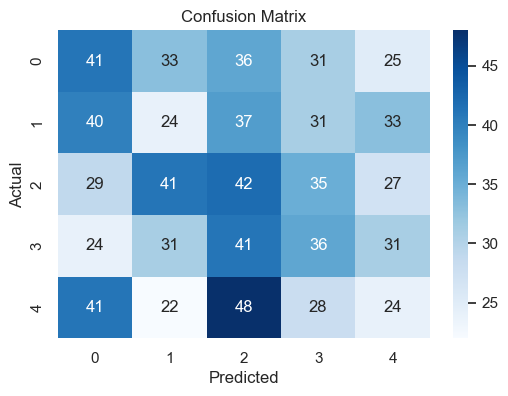

In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


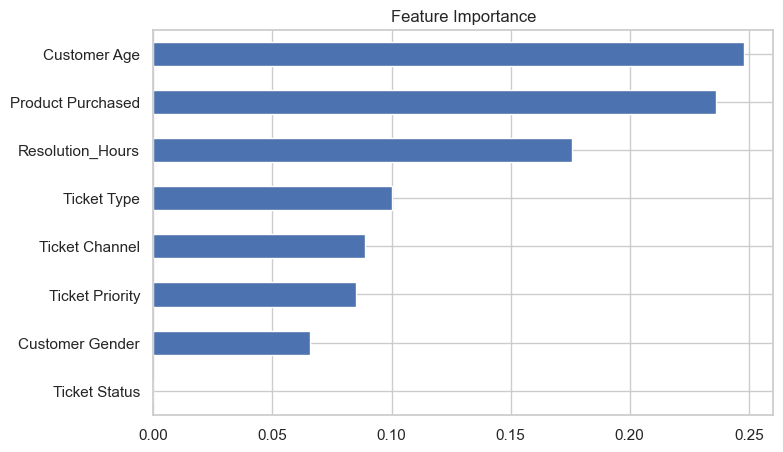

In [37]:
importances = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=True)

plt.figure(figsize=(8,5))
importances.plot(kind='barh')
plt.title("Feature Importance")
plt.show()


In [38]:
import os
os.makedirs("model", exist_ok=True)


In [39]:
import pickle

# Save trained model
with open("model/customer_satisfaction_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)


In [40]:
with open("model/feature_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)
